In [1]:
# import pandas_datareader as pdr
# key="e270c0b86eaf384ff02a92a1b47973a897a0d93f"
# df = pdr.get_data_tiingo('AAPL', api_key=key)
# df.to_csv('AAPL.csv')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
dff=pd.read_csv('AAPL.csv')

In [4]:
dff

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [5]:
# Taking only close values
df=dff.iloc[:,3]
df.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [6]:
df.shape

(1258,)

Text(0.5, 1.0, 'APPL stock prices')

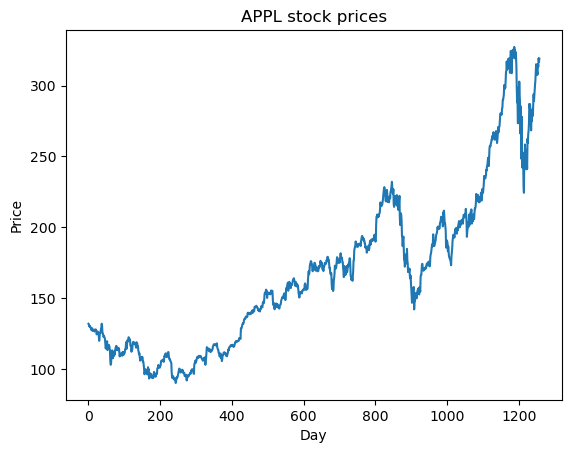

In [7]:
plt.plot(df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('APPL stock prices')

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=scaler.fit_transform(np.array(df).reshape(-1, 1))
df

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [9]:
## We will take train entries till 1000
df=pd.DataFrame(df)
train=df.iloc[:1000,:]
print(train)
test=df.iloc[1000:,:]
print(test)

            0
0    0.176074
1    0.174956
2    0.168623
3    0.169699
4    0.167272
..        ...
995  0.466014
996  0.451068
997  0.402685
998  0.415098
999  0.424639

[1000 rows x 1 columns]
             0
1000  0.421093
1001  0.416533
1002  0.391582
1003  0.406400
1004  0.390273
...        ...
1253  0.948324
1254  0.940640
1255  0.966351
1256  0.956303
1257  0.964916

[258 rows x 1 columns]


In [10]:
def create_dataset(dataset,timestep=1):
    x=[]
    y=[]
    for i in range(len(dataset)-timestep):
        x.append(dataset.iloc[i:i+timestep,0])
        y.append(dataset.iloc[i+timestep,:])
    return np.array(x),np.array(y)

In [11]:
x_train,y_train=create_dataset(train,100)
x_test,y_test=create_dataset(test,100)
print(f'size of x_train={x_train.shape}\nsize of x_test={x_test.shape}\nsize of y_train={y_train.shape}\nsize of y_test={y_test.shape}')

size of x_train=(900, 100)
size of x_test=(158, 100)
size of y_train=(900, 1)
size of y_test=(158, 1)


The code snippet reshapes the input data X_train and X_test to a 3D shape suitable for training an LSTM (Long Short-Term Memory) network. LSTM models require input data to have a specific shape: [samples, time steps, features].

Here's a breakdown of what each dimension represents:

Samples (X_train.shape[0], X_test.shape[0]):

This is the number of data points or sequences in your dataset. Each data point is considered a sample.
Time Steps (X_train.shape[1], X_test.shape[1]):

This represents the number of time steps in each sample. For each sequence, this is how many time points you want the LSTM to look at.
Features (1):

This is the number of features (variables) at each time step. Since you are reshaping with 1 here, it implies you have a single feature (or dimension) per time step. If you had more features (e.g., multiple measurements at each time step), you would adjust this accordingly.

In [12]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))

# return_sequences=True: 
# This ensures that the LSTM layer returns the full sequence of outputs 
# for each time step, rather than just the output at the final time step. 

model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/Users/ishankanodia/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


###### return_sequences=True
This ensures that the LSTM layer returns the full sequence of outputs for each time step, rather than just the output at the final time step. This is useful when you are stacking multiple LSTM layers.

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

##### verbose Options:

verbose=0: No output is shown during training.

verbose=1: A progress bar is shown during training, along with other metrics (like loss and accuracy) for each epoch.

verbose=2: One line is printed per epoch, showing the training metrics (e.g., loss, accuracy) without a progress bar.

In [16]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0432 - val_loss: 0.1313
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0071 - val_loss: 0.0143
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0018 - val_loss: 0.0073
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0011 - val_loss: 0.0078
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0010 - val_loss: 0.0119
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0013 - val_loss: 0.0096
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 9.0493e-04 - val_loss: 0.0095
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 9.1395e-04 - val_loss: 0.0095
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 8.7308e-04 - val_loss: 0.0090
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 8.5639e-04 - val_loss: 0.0094
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 7.6835e-04 - val_loss: 0.0089
Epoch 12/100
15/15 ━━━━━━━━━━━━━

In [17]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [18]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
test_predict

array([[222.33362],
       [223.28246],
       [224.1416 ],
       [225.34393],
       [227.67195],
       [230.35963],
       [232.60292],
       [233.87962],
       [234.40587],
       [234.59288],
       [235.31235],
       [236.24399],
       [237.66826],
       [239.23483],
       [241.09671],
       [243.26198],
       [244.17166],
       [243.94055],
       [244.04723],
       [245.80522],
       [248.72366],
       [251.67216],
       [253.9425 ],
       [255.67003],
       [256.8751 ],
       [257.91144],
       [258.62714],
       [259.44437],
       [259.84735],
       [260.42932],
       [261.2953 ],
       [262.00766],
       [261.8479 ],
       [260.88733],
       [259.5874 ],
       [259.22162],
       [259.21783],
       [260.00885],
       [261.02505],
       [261.3272 ],
       [260.15958],
       [258.67044],
       [258.08237],
       [259.19827],
       [260.47495],
       [261.69424],
       [262.9993 ],
       [264.21912],
       [265.79282],
       [268.1546 ],


In [20]:
from sklearn.metrics import mean_squared_error
import math

In [21]:
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

152.9498898426265
270.9564743704502


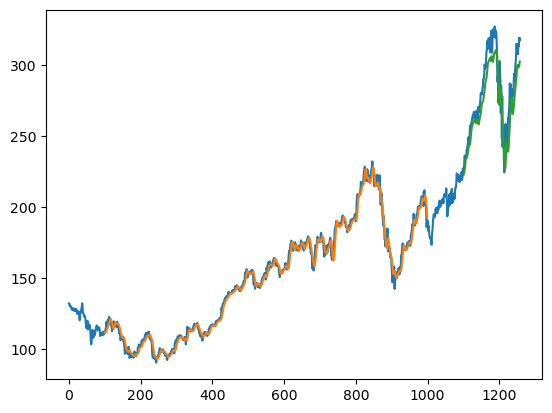

In [22]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(df), :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
last_day=dff.iloc[-100:,3]
last_day

1158    293.65
1159    300.35
1160    297.43
1161    299.80
1162    298.39
         ...  
1253    314.96
1254    313.14
1255    319.23
1256    316.85
1257    318.89
Name: close, Length: 100, dtype: float64

In [24]:
last_day=scaler.fit_transform(np.array(last_day).reshape(-1, 1))
last_day

array([[0.67373335],
       [0.73888943],
       [0.71049305],
       [0.7335408 ],
       [0.71982884],
       [0.76650783],
       [0.82913547],
       [0.83594282],
       [0.90041817],
       [0.85879607],
       [0.84576485],
       [0.88369153],
       [0.91763104],
       [0.8966255 ],
       [0.90761451],
       [0.92249344],
       [0.91354663],
       [0.82252261],
       [0.90751726],
       [0.9721871 ],
       [0.96761645],
       [0.82796849],
       [0.81970242],
       [0.91879802],
       [0.94408247],
       [0.98064767],
       [0.93027327],
       [0.94505495],
       [0.92618886],
       [1.        ],
       [0.97734124],
       [0.97811923],
       [0.92025673],
       [0.96518526],
       [0.93289896],
       [0.86239424],
       [0.71778664],
       [0.61956627],
       [0.66400856],
       [0.47797335],
       [0.47641739],
       [0.72391325],
       [0.63162501],
       [0.76213167],
       [0.66663425],
       [0.62880482],
       [0.40649616],
       [0.592

In [25]:
last_day=last_day.reshape(1,100,1)
ans=model.predict(last_day)
ans=scaler.inverse_transform(ans)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [26]:
ans=ans[0][0]

In [27]:
print(f'The predicted price of next day out of the dataset will be \"{ans}\".')

The predicted price of next day out of the dataset will be "314.81500244140625".
